<a href="https://colab.research.google.com/github/syuan0525/Deeplearning/blob/main/motomodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 讀取 google drive圖檔 :

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import zipfile
f = zipfile.ZipFile("/content/drive/MyDrive/SYM_活力.zip")
f.extractall()
f2 = zipfile.ZipFile("/content/drive/MyDrive/SYM_活力_125_裁.zip")
f2.extractall()

In [44]:
import glob
gp = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外拍及網路)/KYMCO_GP/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/對面課金的/symgp125/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含不用裁的)/KYM_GP_125_裁/*.jpg")
# 活力 125 原始+ 裁
vivo = glob.glob("power/*.jpg") + glob.glob("power_cut/*.jpg")

# 勁戰六代 原始+ 裁
gryphus6 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外拍及網路)/YAMAHA_六代勁戰/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含不用裁的)/YAMAHA_六代勁戰_125_裁/*.jpg")

# SYM JET SR  ...
SR = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外拍及網路)/SYM_JET_SR/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含不用裁的)/SYM_JET_SR_125_裁/*.jpg")

# DRG
DRG = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外拍及網路)/SYM_DRG/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含不用裁的)/SYM_DRG_裁/*.jpg") 

# FIDDLE
FIDDLE = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外拍及網路)/SYM_FIDDLE/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含不用裁的)/SYM_FIDDLE_125_裁/*.jpg") 

# gogoro S2
S2 = glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外拍及網路)/GOGORO_S2/*.jpg") + glob.glob("/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含不用裁的)/GOGORO_S2_裁/*.jpg")




In [45]:
import pandas as pd
df = pd.DataFrame({
    "path": gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2,
    "ans": [0] * len(gp) + [1] * len(vivo) + [2] * len(gryphus6) + [3] * len(SR) + [4] * len(DRG) + [5] * len(FIDDLE) + [6] * len(S2)
})
df

,path,ans
0,/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...,0
1,/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...,0
2,/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...,0
3,/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...,0
4,/content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...,0
...,...,...
4659,/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...,6
4660,/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...,6
4661,/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...,6
4662,/content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...,6


#### 偷別人卷積網路 :
###### google keras application

In [46]:
from tensorflow.keras.applications.vgg16 import VGG16  # 偷別人眼睛
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
cnn.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##### 高參數 =>訓練資料要多
##### 低參數 =>訓練資料要少

#####開始疊層數

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
cnn.layers

In [48]:
for l in cnn.layers:
  l.trainable = False  # cnn 已經是訓練好的了，所以先凍住cnn的參數 ，只訓練後面的mlp的參數 # 要在 compile 前設

layers = [
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dense(7, activation="softmax")
]
model = Sequential(cnn.layers + layers) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

##### 模型 compile

In [49]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

###### 先看一下圖片

[[[151.061    138.22101  131.32    ]
  [151.061    138.22101  131.32    ]
  [151.061    138.22101  131.32    ]
  ...
  [133.061    122.221    115.32    ]
  [133.061    122.221    115.32    ]
  [135.061    124.221    117.32    ]]

 [[151.061    138.22101  131.32    ]
  [151.061    138.22101  131.32    ]
  [151.061    138.22101  131.32    ]
  ...
  [137.061    127.221    120.32    ]
  [142.061    132.22101  124.32    ]
  [146.061    135.22101  128.32    ]]

 [[120.061    115.221    107.32    ]
  [115.061    111.221    105.32    ]
  [115.061    110.221    106.32    ]
  ...
  [141.061    128.22101  121.32    ]
  [135.061    122.221    115.32    ]
  [128.061    115.221    108.32    ]]

 ...

 [[-33.939003 -48.779    -62.68    ]
  [-34.939003 -47.779    -62.68    ]
  [-35.939003 -50.779    -64.68    ]
  ...
  [-25.939003 -45.779    -61.68    ]
  [-23.939003 -43.779    -60.68    ]
  [-19.939003 -39.779    -55.68    ]]

 [[-34.939003 -50.779    -64.68    ]
  [-32.939003 -48.779    -59.68    ]


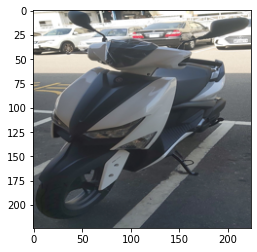

In [50]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# import 匯入 當初預處理的方式
from tensorflow.keras.applications.vgg16 import preprocess_input 
p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
# VGG16 的資料是怎麼預處理的 ? google preprocess_input github
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)

In [51]:
p

0       /content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...
1       /content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...
2       /content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...
3       /content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...
4       /content/drive/MyDrive/Tebame_第四組_機車辨識/原始照片(含外...
                              ...                        
4659    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...
4660    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...
4661    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...
4662    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...
4663    /content/drive/MyDrive/Tebame_第四組_機車辨識/裁剪照片(不含...
Name: path, Length: 4664, dtype: object

### generator

In [52]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [53]:
def data_generator(x, y, batch_size=19):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
print(x_gen.shape)
print(y_gen.shape)
print(x_gen)
print(y_gen)


(19, 224, 224, 3)
(19,)
[[[[-1.9390030e+00  2.9221001e+01  5.1320000e+01]
   [-3.9390030e+00  2.5221001e+01  4.9320000e+01]
   [-7.9390030e+00  1.7221001e+01  3.9320000e+01]
   ...
   [ 1.1906100e+02  1.0922100e+02  1.1232000e+02]
   [ 1.0706100e+02  1.1522100e+02  1.2032000e+02]
   [ 1.0306100e+02  1.1822100e+02  1.2232000e+02]]

  [[-9.9390030e+00  2.2221001e+01  4.8320000e+01]
   [-6.9390030e+00  2.3221001e+01  4.7320000e+01]
   [-9.9390030e+00  1.7221001e+01  4.1320000e+01]
   ...
   [ 1.1906100e+02  1.1122100e+02  1.1332000e+02]
   [ 1.0206100e+02  1.1222100e+02  1.1732000e+02]
   [ 1.0206100e+02  1.2022100e+02  1.2432000e+02]]

  [[-1.2939003e+01  1.9221001e+01  4.5320000e+01]
   [-1.3939003e+01  1.8221001e+01  4.4320000e+01]
   [-1.0939003e+01  2.0221001e+01  4.5320000e+01]
   ...
   [ 1.1706100e+02  1.0922100e+02  1.1232000e+02]
   [ 1.0606100e+02  1.1322100e+02  1.1632000e+02]
   [ 1.0406100e+02  1.2522100e+02  1.2932001e+02]]

  ...

  [[-7.7939003e+01 -8.7778999e+01 -9.26800

In [54]:
gp_x = x[y == 0]
vivo_x = x[y == 1]
gryphus6_x = x[y == 2]
SR_x = x[y == 3]
DRG_x = x[y == 4]
FIDDLE_x = x[y == 5]
S2_x = x[y == 6]
print("gp 共:", len(gp_x))
print("活力 共:", len(vivo_x))
print("勁戰6 共:", len(gryphus6_x))
print("SR 共:", len(SR_x))
print("DRG 共:", len(DRG_x))
print("FIDDLE 共:", len(FIDDLE_x))
print("S2 共:", len(S2_x))

gp 共: 537
活力 共: 660
勁戰6 共: 709
SR 共: 482
DRG 共: 501
FIDDLE 共: 1157
S2 共: 618


In [55]:
from sklearn.model_selection import train_test_split

 # gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2

gp_380 = np.random.choice(gp_x, 380, replace=False)
gp_342, gp_38 = train_test_split(gp_380, test_size=0.1)

vivo_380 = np.random.choice(vivo_x, 380, replace=False)
vivo_342, vivo_38 = train_test_split(vivo_380, test_size=0.1)

gryphus6_380 = np.random.choice(gryphus6_x, 380, replace=False)
gryphus6_342, gryphus6_38 = train_test_split(gryphus6_380, test_size=0.1)

SR_380 = np.random.choice(SR_x, 380, replace=False)
SR_342, SR_38 = train_test_split(SR_380, test_size=0.1)

DRG_380 = np.random.choice(DRG_x, 380, replace=False)
DRG_342, DRG_38 = train_test_split(DRG_380, test_size=0.1)

FIDDLE_380 = np.random.choice(FIDDLE_x, 380, replace=False)
FIDDLE_342, FIDDLE_38 = train_test_split(FIDDLE_380, test_size=0.1)

S2_380 = np.random.choice(S2_x, 380, replace=False)
S2_342, S2_38 = train_test_split(S2_380, test_size=0.1)


x_train = np.concatenate((gp_342, vivo_342, gryphus6_342, SR_342, DRG_342, FIDDLE_342, S2_342))
y_train = np.array([0] * len(gp_342) + [1] *len(vivo_342) + [2] *len(gryphus6_342) + [3] *len(SR_342) + [4] *len(DRG_342) + [5] *len(FIDDLE_342) + [6] *len(S2_342))
x_test = np.concatenate((gp_38, vivo_38, gryphus6_38, SR_38, DRG_38, FIDDLE_38, S2_38))
y_test = np.array([0] * len(gp_38) + [1] *len(vivo_38) + [2] *len(gryphus6_38) + [3] *len(SR_38) + [4] *len(DRG_38) + [5] *len(FIDDLE_38) + [6] *len(S2_38))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2394,)
(266,)
(2394,)
(266,)


In [56]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [57]:
# 20 * 19 => 380訓練
# 5 * 19 => 38測試
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=5, restore_best_weights=True),
             ModelCheckpoint("scooter.h5", save_best_only=True)
]

model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=100,
    validation_data=test_generator,
    validation_steps=2, 
    callbacks=callbacks
                    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
20/20 [==============================] - 66s 3s/step - loss: 1.9446 - acc: 0.1816 - val_loss: 2.1058 - val_acc: 0.2895
Epoch 2/100
20/20 [==============================] - 90s 5s/step - loss: 1.7817 - acc: 0.3316 - val_loss: 1.7684 - val_acc: 0.2368
Epoch 3/100
20/20 [==============================] - 57s 3s/step - loss: 1.5995 - acc: 0.4658 - val_loss: 1.3647 - val_acc: 0.4737
Epoch 4/100
20/20 [==============================] - 55s 3s/step - loss: 1.4636 - acc: 0.5632 - val_loss: 1.1842 - val_acc: 0.5789
Epoch 5/100
20/20 [==============================] - 52s 3s/step - loss: 1.3046 - acc: 0.6684 - val_loss: 1.2006 - val_acc: 0.5789
Epoch 6/100
20/20 [==============================] - 49s 3s/step - loss: 1.2349 - acc: 0.6632 - val_loss: 0.9435 - val_acc: 0.8421
Epoch 7/100
20/20 [==============================] - 47s 2s/step - loss: 1.1330 - acc: 0.7553 - val_loss: 1.1122 - val_acc: 0.7105
Epoch 8/100
20/20 [==============================] - 43s 2s/step - loss: 1.0370 - a

In [58]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)



In [59]:
pre = pre.argmax(axis=1)

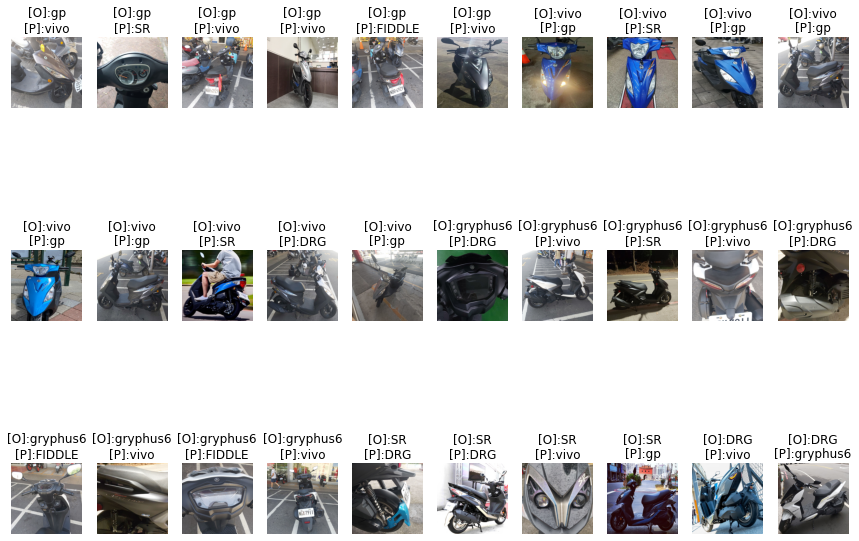

In [60]:
trans = ["gp", "vivo", "gryphus6", "SR", "DRG", "FIDDLE", "S2"]
 # gp + vivo + gryphus6 + SR + DRG + FIDDLE + S2
idx = np.nonzero(pre != y_test)[0]
pre_false_img = ori_imgs[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(15, 15))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_ori[i]],
                                trans[pre_false_val[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])


In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(7)],
        columns=["{}(預測)".format(trans[i]) for i in range(7)]
)

,gp(預測),vivo(預測),gryphus6(預測),SR(預測),DRG(預測),FIDDLE(預測),S2(預測)
gp(正確),32,4,0,1,0,1,0
vivo(正確),6,29,0,2,1,0,0
gryphus6(正確),0,4,29,1,2,2,0
SR(正確),1,1,0,34,2,0,0
DRG(正確),0,1,1,0,36,0,0
FIDDLE(正確),0,0,0,0,0,38,0
S2(正確),0,0,0,0,0,0,38


In [ ]:
import requests
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)
#trans = ["gp", "vivo", "gryphus6", "SR", "DRG", "FIDDLE", "S2"]

In [ ]:
#01:33:12